In [26]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

In [27]:
(X_train, _), (X_test, _) = mnist.load_data()

In [28]:
X_train[4].shape

(28, 28)

In [29]:
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

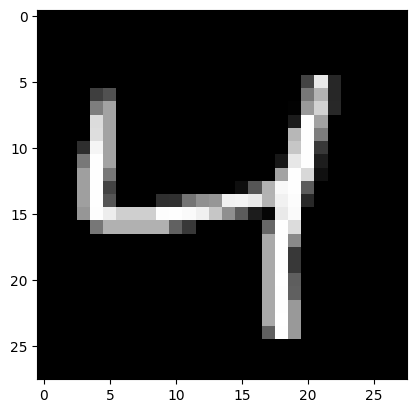

In [30]:
plt.imshow(X_train[2], cmap='gray')
plt.show()

In [31]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [32]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [33]:
x_train_noise = X_train + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noise = X_test + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [34]:
x_train_noise = np.clip(x_train_noise, 0.0, 1.0)
x_test_noise = np.clip(x_test_noise, 0.0, 1.0)

In [37]:
inputs = Input(shape=(784,))
encoder = Dense(32, activation='relu')(inputs)
decoder = Dense(784, activation='sigmoid')(encoder)
autoencoder = Model(inputs, decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noise, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test_noise, X_test))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.3651 - val_loss: 0.2215
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2076 - val_loss: 0.1772
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1737 - val_loss: 0.1609
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1590 - val_loss: 0.1488
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1478 - val_loss: 0.1410
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1408 - val_loss: 0.1356
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1355 - val_loss: 0.1319
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1322 - val_loss: 0.1293
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.1301 - val_loss: 0.1279
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1281 - val_loss: 0.1268
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1274 - val_loss: 0.1262
Epoch 12/100
235/235 ━━━━━━━━━

In [48]:
idx = np.random.randint(X_test.shape[0])
original_image = X_test[idx]

noise_image = original_image + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=original_image.shape)
noise_image = np.clip(noise_image, 0.0, 1.0)

denoised_image = autoencoder.predict(np.expand_dims(noise_image, axis=0))
denoised_image = denoised_image.reshape((28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


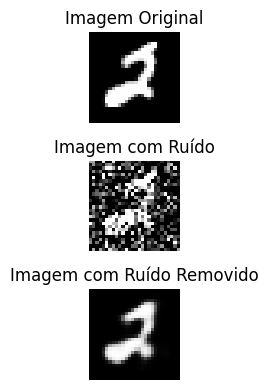

In [49]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 4), tight_layout=True)

axes[0].imshow(original_image.reshape(28, 28), cmap='gray')
axes[0].set_title('Imagem Original')
axes[0].axis('off')

axes[1].imshow(noise_image.reshape(28, 28), cmap='gray')
axes[1].set_title('Imagem com Ruído')
axes[1].axis('off')

axes[2].imshow(denoised_image, cmap='gray')
axes[2].set_title('Imagem com Ruído Removido')
axes[2].axis('off')

plt.show()